# POKEMANS

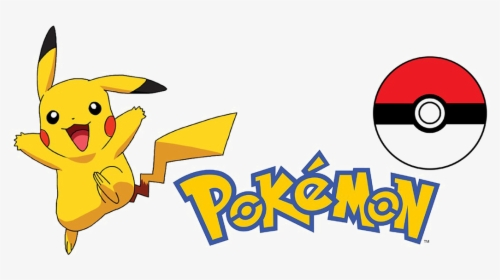

## Table of Contents

* [I.Overview Analysis](#part-one)
    - [A. How many Pokemon are there in total?  How many per generation?](#subsection-a)
    - [B. What is the most common type of Pokemon?  Per generation?](#subsection-b)
    - [C. How do stats vary across generations and between legendary and non-legendary Pokemon?](#subsection-c)
* [II. Comparison of Starter Pokemon](#part-two)
    - [A. Stage 1](#subsection-aa)
    - [B. Stage 2](#subsection-bb)
    - [C. Stage 3](#subsection-cc)
    - [D. Type (Grass, Water, Fire)](#subsection-dd)
* [III. Comparison of Eeveelutions](#part-three)


<a id="part-one"></a>
### I. Overview Analysis

***Questions:***

A. How many Pokemon are there in total?  How many per generation? <br>
B. What is the most common type of pokemon?  Per generation? <br>
C. How do stats vary across generations and between legendary and non-legendary Pokemon?

In [3]:
##load libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [5]:
##import the data
pm= pd.read_csv('Pokemon.csv')

In [6]:
##inspect the data
pm.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
pm.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [8]:
pm.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [18]:
##create a type 0 column to view both types together
pm_edit = pm.fillna('none')
pm_edit.iloc[40:50]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
40,35,Clefairy,Fairy,none,323,70,45,48,60,65,35,1,False
41,36,Clefable,Fairy,none,483,95,70,73,95,90,60,1,False
42,37,Vulpix,Fire,none,299,38,41,40,50,65,65,1,False
43,38,Ninetales,Fire,none,505,73,76,75,81,100,100,1,False
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
47,42,Golbat,Poison,Flying,455,75,80,70,65,75,90,1,False
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
49,44,Gloom,Grass,Poison,395,60,65,70,85,75,40,1,False


In [20]:
# Creating a brand new column appending then types 1 and 2 together
pm_edit['Type 0']= pm_edit['Type 1']+ "/" + pm_edit['Type 2']
pm_edit.iloc[40:90]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0
40,35,Clefairy,Fairy,none,323,70,45,48,60,65,35,1,False,Fairy/none
41,36,Clefable,Fairy,none,483,95,70,73,95,90,60,1,False,Fairy/none
42,37,Vulpix,Fire,none,299,38,41,40,50,65,65,1,False,Fire/none
43,38,Ninetales,Fire,none,505,73,76,75,81,100,100,1,False,Fire/none
44,39,Jigglypuff,Normal,Fairy,270,115,45,20,45,25,20,1,False,Normal/Fairy
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False,Normal/Fairy
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False,Poison/Flying
47,42,Golbat,Poison,Flying,455,75,80,70,65,75,90,1,False,Poison/Flying
48,43,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False,Grass/Poison
49,44,Gloom,Grass,Poison,395,60,65,70,85,75,40,1,False,Grass/Poison


In [21]:
#create an avg skill point column
pm_edit['average_skp']= (pm_edit['Total']/ 6)
pm_edit.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 0,average_skp
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass/Poison,53.000000
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass/Poison,67.500000
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass/Poison,87.500000
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass/Poison,104.166667
4,4,Charmander,Fire,none,309,39,52,43,60,50,65,1,False,Fire/none,51.500000


In [ ]:
pm_edit.head()

<a id="subsection-a"></a>
**A. How many Pokemon are there in total?  How many per generation?**

In [ ]:
pm_edit.nunique()
## 721 total pokemon

In [ ]:
pm_edit.groupby('Generation').nunique()

In [ ]:
#Gen1 151
#Gen2 100
#Gen3 135
#Gen4 107
#Gen5 156
#Gen6 72

In [ ]:
## So here I've made the decision to drop the "mega" pokemon
## I am a 90s kid so I won't deny the age bias in this decision
## Primarily though, the stats for those pokemon are so far blown out of proportion that they are all essentially outliers (see below)
## The average skill point value for mega pokemon is about 30 points higher than the average skill point value for non-mega pokemon

pm_2 = pm_edit.loc[~pm_edit['Name'].str.contains('Mega ')]

In [ ]:
megas = pm_edit.loc[pm_edit['Name'].str.contains('Mega ')]

In [ ]:
#megas
megas.loc[:,['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed','average_skp']].describe()

In [ ]:
#non-megas
pm_2.loc[:,['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed','average_skp']].describe()

<a id="subsection-b"></a>
**B. What is the most common type of Pokemon?  Per generation?**

In [ ]:
#how many types?
pm_2['Type 1'].nunique()

In [ ]:
#what are the types?
pm_2['Type 1'].unique()

In [ ]:
#how many type combos?
pm_2['Type 0'].nunique()

In [ ]:
#what are all of the different type combos?
pm_2['Type 0'].unique()

In [ ]:
## all type combo counts
pm_2['count']=1

In [ ]:
pd.set_option('display.max_rows', 500)
pm_2.groupby(['Type 0'], dropna='False').count()['count']

In [ ]:
##most common types overall
pd.set_option('display.max_rows', 10)
pm_2.groupby(['Type 0'], dropna='False').count().sort_values('#', ascending=False)

In [ ]:
##most common types overall visualized
ctypes = sns.countplot(y='Type 0', data=pm_2, order= pm_2['Type 0'].value_counts().nlargest(n=10).index)
ctypes.bar_label(ctypes.containers[0]);

In [ ]:
##most common type per generation
gen1 = pm_2.loc[pm_2['Generation']==1]

In [ ]:
gen2 = pm_2.loc[pm_2['Generation']==2]

In [ ]:
gen3 = pm_2.loc[pm_2['Generation']==3]

In [ ]:
gen4 = pm_2.loc[pm_2['Generation']==4]

In [ ]:
gen5 = pm_2.loc[pm_2['Generation']==5]

In [ ]:
gen6 = pm_2.loc[pm_2['Generation']==6]

In [ ]:
##gen1, gen2, and gen3 side by side
plt.rcParams["figure.figsize"] = [18.00, 4.00]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

gen1ctypes = sns.countplot(y='Type 0', data=gen1, order= gen1['Type 0'].value_counts().nlargest(n=10).index, ax= ax[0])
gen1ctypes.bar_label(gen1ctypes.containers[0]);
gen1ctypes.set_title('Gen 1')

gen2ctypes = sns.countplot(y='Type 0', data=gen2, order= gen2['Type 0'].value_counts().nlargest(n=10).index, ax= ax[1])
gen2ctypes.bar_label(gen2ctypes.containers[0]);
gen2ctypes.set_title('Gen 2')

gen3ctypes = sns.countplot(y='Type 0', data=gen3, order= gen3['Type 0'].value_counts().nlargest(n=10).index, ax= ax[2])
gen3ctypes.bar_label(gen3ctypes.containers[0]);
gen3ctypes.set_title('Gen3')

In [ ]:
##gen4, gen5, and gen6 side by side
plt.rcParams["figure.figsize"] = [18.00, 4.00]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

gen4ctypes = sns.countplot(y='Type 0', data=gen4, order= gen4['Type 0'].value_counts().nlargest(n=10).index, ax= ax[0])
gen4ctypes.bar_label(gen4ctypes.containers[0]);
gen4ctypes.set_title('Gen 4')

gen5ctypes = sns.countplot(y='Type 0', data=gen5, order= gen5['Type 0'].value_counts().nlargest(n=10).index, ax= ax[1])
gen5ctypes.bar_label(gen5ctypes.containers[0]);
gen5ctypes.set_title('Gen 5')

gen6ctypes = sns.countplot(y='Type 0', data=gen6, order= gen6['Type 0'].value_counts().nlargest(n=10).index, ax = ax[2])
gen6ctypes.bar_label(gen6ctypes.containers[0]);
gen6ctypes.set_title('Gen 6')

In [ ]:
##that's curious that gen5 and gen6 are different
##let's look into that

In [ ]:
pm_2.loc[(pm_2['Generation']==5) & (pm_2['Type 0']=='Psychic/none')]

In [ ]:
##okay so gen5 checks out--just a lot of psychic pokemon

In [ ]:
pm_2.loc[(pm_2['Generation']==6) & (pm_2['Type 0']=='Ghost/Grass')]

In [ ]:
##ah...let's just take one Pumpkaboo and one Gourgeist--the average sized ones
gen6_edit= gen6.drop([781, 782, 783, 785, 786, 787])

In [ ]:
##redo this without the duplicate Pumpkaboos and Gourgeists
pd.set_option('display.max_rows', 10)
gen6_edit.groupby(['Type 0'], dropna='False').count().sort_values('#', ascending=False)

In [ ]:
##that looks much better
##BUT--sanity check of fairy type
pm_2.loc[(pm_2['Generation']==6) & (pm_2['Type 0']=='Fairy/none')]

In [ ]:
##cool now let's fix that visual of gen4,5,and 6

In [ ]:
##gen4, gen5, and gen6 side by side
plt.rcParams["figure.figsize"] = [18.00, 4.00]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

gen4ctypes = sns.countplot(y='Type 0', data=gen4, order= gen4['Type 0'].value_counts().nlargest(n=10).index, ax= ax[0])
gen4ctypes.bar_label(gen4ctypes.containers[0]);
gen4ctypes.set_title('Gen 4')

gen5ctypes = sns.countplot(y='Type 0', data=gen5, order= gen5['Type 0'].value_counts().nlargest(n=10).index, ax= ax[1])
gen5ctypes.bar_label(gen5ctypes.containers[0]);
gen5ctypes.set_title('Gen 5')

gen6_editctypes = sns.countplot(y='Type 0', data=gen6_edit, order= gen6_edit['Type 0'].value_counts().nlargest(n=10).index, ax = ax[2])
gen6_editctypes.bar_label(gen6_editctypes.containers[0]);
gen6_editctypes.set_title('Gen 6')

<a id="subsection-c"></a>
**C. How do stats vary across generations and between legendary and non-legendary Pokemon?**

In [ ]:
##the overall stats of non-mega pokemon were already shown when comparing them to the mega pokemon stats, but here is a refresher
pm_2.loc[:,['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed','average_skp']].describe()

In [ ]:
##visualize average skill points by generation
sns.boxplot(x='average_skp', y='Generation', data= pm_2, orient='h')

In [ ]:
##breakdown of skill points per generation

plt.rcParams["figure.figsize"] = [14.00, 5.00]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

spbp= sns.boxplot(x='Speed', y='Generation', data= pm_2, orient='h',ax= ax[0])
spbp.set_title('Speed')

abp= sns.boxplot(x='Attack', y='Generation', data= pm_2, orient='h',ax= ax[1])
abp.set_title('Attack')

sabp= sns.boxplot(x='Sp. Atk', y='Generation', data= pm_2, orient='h', ax= ax[2])
sabp.set_title('Sp. Atk')

In [ ]:
plt.rcParams["figure.figsize"] = [14.00, 5.00]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots(nrows=1, ncols=3)

hpbp= sns.boxplot(x='HP', y='Generation', data= pm_2, orient='h',ax= ax[0])
hpbp.set_title('HP')

dbp= sns.boxplot(x='Defense', y='Generation', data= pm_2, orient='h',ax= ax[1])
dbp.set_title('Defense')

sdbp= sns.boxplot(x='Sp. Def', y='Generation', data= pm_2, orient='h', ax= ax[2])
sdbp.set_title('Sp. Def')

In [ ]:
##stats for legendary pokemon
pm_2_leg= pm_2.loc[(pm_2['Legendary'])==True]
pm_2_leg.loc[:,['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']].describe()

In [ ]:
##stats for regular non-legendary pokemon
pm_2_reg = pm_2.loc[(pm_2['Legendary'])==False]
pm_2_reg.loc[:,['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']].describe()

In [ ]:
##legendary counts
pm_2_leg.groupby(['Generation'], dropna='False').nunique()

In [ ]:
##wow okay
# gen1 4
# gen2 5
# gen3 10
# gen4 11
# gen5 10
# gen6 6

#gen1 has the least and gen4 has the most
#gen6 goes back to a smaller number

In [ ]:
##what are the gen4 legendaries? 
pd.set_option('display.max_rows', 50)
pm_2_leg.loc[(pm_2_leg['Generation']==4)]

In [ ]:
##total skill points by generation legendary v non-legendary
plt.rcParams["figure.figsize"] = [12.00, 7.00]
sns.swarmplot(x='Generation', y='average_skp', data=pm_2, hue='Legendary')

In [ ]:
##generally speaking the legendary pokemon have higher average skill points

In [ ]:
sns.swarmplot(x='Generation', y='HP', data=pm_2, hue='Legendary')

In [ ]:
##the HP of the legendaries seems to be more variable--especially from gen3 onward
##there are also more legendary pokemon from gen3 onward--we will look at the exact counts 

In [ ]:
sns.swarmplot(x='Generation', y='Attack', data=pm_2, hue='Legendary')

In [ ]:
##hm gen3 has a legendary with an unusually low attack

In [ ]:
sns.swarmplot(x='Generation', y='Defense', data=pm_2, hue='Legendary')

In [ ]:
##annnd gen3 has a legendary with an unusually low defense-- we will take a more in-depth look at gen3 legendaries

In [ ]:
sns.swarmplot(x='Generation', y='Speed', data=pm_2, hue='Legendary')

In [ ]:
sns.swarmplot(x='Generation', y='Sp. Atk', data=pm_2, hue='Legendary')

In [ ]:
sns.swarmplot(x='Generation', y='Sp. Def', data=pm_2, hue='Legendary')

In [ ]:
##okay let's take a closer look at the gen3 legendaries

pm_2.loc[(pm_2['Generation']==3)& (pm_2['Legendary']==True)]

In [ ]:
##ah-ha!  Deoxys has different forms focusing on specific skills--that explains why there were legendaries with such low skill points
## DeoxysAttack Forme only has a def and sp def of 20
## additoinally Regirock and Regice respectively have the lowest sp atk and attack of the gen3 legendaries
## Regirock and Regice, however, respectively have exceptional defense and sp. defense

<a id="part-two"></a>
### II. Comparison of Starter Pokemon



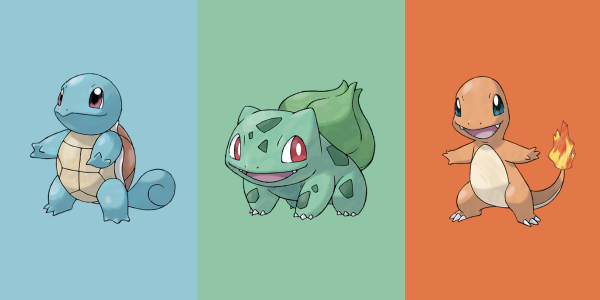

***Questions:***

Which generation has the best starters at stage 1, 2, and 3? <br>
Which is the best pokemon at stage 1, 2, and 3? <br>
Which pokemon is the best based on type? Grass, water, and fire <br>


In [ ]:
# how do we define the "best"?
# highest avg skill points for our purposes
# people play pokemon and create their team differently 
# some people want a balanced starter, some want a tank to steam roll over everything
# this isn't a definitive answer- just one possible answer to this question

In [ ]:
# ##Starter pokemon and subsequent evolutions for each gen

#    GRASS        FIRE       WATER

# 1 Bulbasaur, Charmander, Squirtle
#   Ivysaur, Charmeleon, Wartortle
#   Venusaur, Charizard, Blastoise

# 2 Chikorita, Cyndaquil, Totodile
#   Bayleef, Quilava, Croconaw
#   Meganium, Typhlosion, Feraligatr

# 3 Treecko, Torchic, Mudkip
#   Grovyle, Combusken, Marshtomp
#   Sceptile, Blaziken, Swampert

# 4 Turtwig, Chimchar, Piplup
#   Grotle, Monferno, Prinplup
#   Torterra, Infernape, Empoleon

# 5 Snivy, Tepig, Oshawott
#   Servine, Pignite, Dewott
#   Serperior, Emboar, Samurott

# 6 Chespin, Fennekin, Froakie
#   Quilladin, Braixen, Frogadier
#   Chesnaught, Delphox, Greninja

In [ ]:
##make a df of just the starters
starters = pm_2.loc[[0,1,2,4,5,6,9,10,11,166,167,168,169,170,171,172,173,174,272,273,274,276,277,278,280,281,282,432,433,434,435,436,437,438,439,440,554,555,556,557,558,559,560,561,562,718,719,720,721,722,723,724,725,726],:]

In [ ]:
print(starters)

In [ ]:
##add an evolution stage column
x = np.array([1,2,3])
stage_num = np.tile(x,18)
starters['stage']= stage_num.tolist() 

In [ ]:
starters.head()

<a id="subsection-aa"></a>
**A. Stage 1**

In [ ]:
##examine the starters at stage 1 across all 6 gens

st1 = starters.loc[starters['stage']==1]
print(st1)

In [ ]:
##first impression/observations
# intersting that bulbasaur is the ONLY one with a second type
# gen5 starters have the lowest total all 3 have 308 total skill pts

In [ ]:
st1.describe()

In [ ]:
st1.groupby(['Generation']).mean().sort_values('average_skp', ascending=False)

In [ ]:
# category   gen with the highest mean

#total       (1,2,4)
#hp          5
#attack      4
#defense     2
#sp atk      3
#sp def      1
#speed       6
#average_skp (1,2,4)

#huh that's interesting--each group of starters is best at one skill- i wonder if that was intentional 
#perhaps even for this very question- so that no group of starters is significantly "better" than another

#for the purposes of this analysis we will say that 1,2,4 have the best st1 starters because they have the highest avg skill points


In [ ]:
sns.violinplot(x='Generation', y='Total', data= st1)

In [ ]:
#and if we want to take this a step further
deep = st1.loc[st1.Generation.isin([1,2,4])]

In [ ]:
deep.groupby(['Generation']).mean().sort_values('average_skp', ascending=False)

In [ ]:
# category   gen with the highest mean

#total      (1,2,4)
#hp         4
#attack     4
#defense    2
#sp atk     1
#sp def     1
#speed      (1,2)

#could argue that gen 1 has the best st1 starters because when compared to gen2 and gen4 it takes the top spot in 3 skill areas sp atk, sp def, and tied for top speed


In [ ]:
##which stage1 starter pokemon is the best?
st1.sort_values('Total', ascending=False)

In [ ]:
# STAGE 1
# INDIVIDUAL stats


# category   highest stat   pokemon with the highest stat
#              
# total      318            Bulbasaur, Chikorita, and Turtwig
# avg_skp    53             Bulbasaur, Chikorita, and Turtwig
# hp         65             Tepig
# attack     70             Mudkip
# defense    65             Squirtle, Chikorita, Chespin
# sp atk     70             Torchic
# sp DEF     65             Bulbasaur, Chikorita
# speed      71             Froakie


In [ ]:
## i would say that Bulbasaur, Chikorita, and Turtwig are the "best" st1 starters
## one step further, chikorita is THE best bc it has the top spot in 3 skill areas avg_skp, tied for def, and tied for sp def

**B. Stage 2**

In [ ]:
##examine the starters at stage 2 across all 6 gens

st2 = starters.loc[starters['stage']==2]
print(st2)

In [ ]:
##observations
##besides bulbasaur's st2 evolution ivysaur, there are 4 additional pokemon at st2 that aqcuire a second type
##the st2 starter pokemon of gen1,2,3,and 4 all have the same average_skp

In [ ]:
st2.groupby(['Generation']).mean().sort_values('average_skp', ascending=False)

In [ ]:
sns.violinplot(x='Generation', y='Total', data= st2)

In [ ]:
st2.sort_values('average_skp', ascending=False)

In [ ]:
## i would say that Pignite is the "best" st2 starters having the best avergae skill points and also the highest hp and attack
## and gen5 wins it for st2

In [ ]:
# STAGE 2
# INDIVIDUAL stats

# category   highest stat   pokemon with the highest stat

# total      418            Pignite
# avg_skp    69.7           Pignite
# hp         90             Pignite
# attack     93             Pignite    
# defense    95             Quilladin    
# sp atk     90             Braixen  
# sp DEF     80             Ivysaur, Wartortle, Bayleaf  
# speed      97             Frogadier  

**C. Stage 3**

In [ ]:
##examine the starters at stage 3 across all 6 gens

st3 = starters.loc[starters['stage']==3]
print(st3)


In [ ]:
##observations
##at st3 there are 11 pokemon with a secondary type 
##fighting is the most common secondary type (if one exists)
##the st3 starter pokemon of gen5 all have the same average_skp

In [ ]:
st3.groupby(['Generation']).mean().sort_values('average_skp', ascending=False)

In [ ]:
sns.violinplot(x='Generation', y='Total', data= st3)

In [ ]:
st3.sort_values('average_skp', ascending=False)

In [ ]:
# STAGE 3
# Highest INDIVIDUAL stats

# category   highest stat   pokemon with the highest stat

# total     535             Swampert 
# avg_skp   89.2            Swampert
# hp        110             Emboar 
# attack    123             Emboar    
# defense   122             Chesnaught
# sp atk    114             Delphox 
# sp DEF    105             Blastoise  
# speed     122             Greninja   

In [ ]:
## i would say that Swampert is the "best" st3 starters
## and gen3 has the best st3 starters

In [ ]:
##best starter pokemon by stage:
# st1 Bulbasaur, Chikorita, and Turtwig (or just Chikorita)
# st2 Pignite
# st3 Swampert

In [ ]:
##also note
# Froakie- has the best speed at all 3 stages!
# Tepig- has the best hp at all 3 stages!

In [ ]:
plt.rcParams["figure.figsize"] = [8.00, 8.00]
sns.violinplot(x='Generation', y='Total', data= starters, hue='stage')

<a id="subsection-dd"></a>
**D. Type (Grass, Water, Fire)**

In [ ]:
##starters by type
#GRASS
stgr = starters.loc[starters['Type 1']=='Grass']
print(stgr)

In [ ]:
stgr.sort_values('average_skp', ascending=False)

In [ ]:
# GRASS
# Highest INDIVIDUAL stats

# category   highest stat   pokemon with the highest stat

# total     530             Chesnaught, Sceptile 
# avg_skp   88.3            Chesnaught, Sceptile     
# hp        95              Torterra
# attack    109             Torterra   
# defense   122             Chesnaught
# sp atk    105             Sceptile
# sp DEF    100             Venusaur
# speed     120             Sceptile  


In [ ]:
##best grass type is Chesnaught and Sceptile
##one step further, Sceptile is THE best bc it has the top spot in 3 skill areas speed, sp atk, and tied for highest avg_skp

In [ ]:
#WATER
stw = starters.loc[starters['Type 1']=='Water']
print(stw)


In [ ]:
stw.sort_values('average_skp', ascending=False)

In [ ]:
# WATER
# Highest INDIVIDUAL stats

# category   highest stat   pokemon with the highest stat

# total     535             Swampert
# avg_skp   89.2            Swampert     
# hp        100             Swampert
# attack    110             Swampert   
# defense   100             Blastoise, Feraligatr
# sp atk    111             Empoleon
# sp DEF    105             Blastoise
# speed     122             Greninja  

In [ ]:
##best water type is Swampert

In [ ]:
##FIRE
stf = starters.loc[starters['Type 1']=='Fire']
print(stf)

In [ ]:
stf.sort_values('average_skp', ascending=False)

In [ ]:
# FIRE
# Highest INDIVIDUAL stats

# category   highest stat   pokemon with the highest stat

# total     534             Delphox, Charizard, Typhlosion, Infernape
# avg_skp   89              Delphox, Charizard, Typhlosion, Infernape 
# hp        110             Emboar
# attack    123             Emboar   
# defense   78              Charizard, Typhlosion
# sp atk    114             Delphox
# sp DEF    100             Delphox
# speed     108             Infernape  

In [ ]:
##best fire type Delphox, Charizard, Typhlosion, Infernape (or just delphox)
##one step further, Delphox is THE best bc it has the top spot in 3 skill areas sp atk, sp def, and tied for highest avg_skp

In [ ]:
##best by type:
# grass- Chesnaught and Sceptile (or just Sceptile)
# water- Swampert
# fire-  Delphox, Charizard, Typhlosion, Infernape (or just Delphox)

<a id="part-three"></a>
### III. Comparison of Eeveelutions

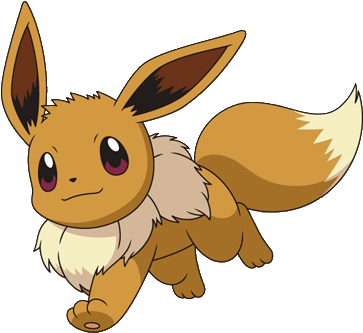

In [ ]:
#make a df of eevee and eveelutions
ev = pm_2.loc[[144,145,146,147,211,212,521,522,770],:]
print(ev)

In [ ]:
ev.describe()

In [ ]:
ev.sort_values('average_skp', ascending=False)

In [ ]:
# All eveelutions have these skill point values 130 65 60 110 95 65
# assigned in different orders
# pretty cool! I was not expecting that
# the question of which is best absolutely depends on the individual and how they build their pokemon team